<h1 style="direction: rtl"> <b> תרגול 10: פתרון נומרי של משוואות דיפרנציאליות ומודל SIR</b> </h1>

In [66]:
import numpy as np
import matplotlib.pyplot as plt

## <div style="direction: rtl"><b> פתרון נומרי של משוואה דיפרנציאלית: scipy.integrate.solve_ivp </b></div> ##

<div style="direction: rtl"> למדנו איך לפתור משוואות רקורסיה בעזרת פונקצית פותר  <code>solve_recursion</code>, שלקחה את המשוואה הרקורסיבית והפתרון ההתחלתי ונתנה את הפתרון בזמן.
</div>

$$ Y\left(t+1\right) = F\left[t,Y\left(t\right)\right] $$

In [68]:
def solve_recursion(f: callable, t_span: (int, int)=(0,1), y0: np.array or float=1)->np.array:
    """Solve the recurrence y(t+1)=f(t,y(t)) in t_span=(t0,tf) starting at y(t0)=y0. Return solution array y[0:tf-t0+1, ...]."""
    y0 = np.array(y0)
    t0, tf = t_span

    t = np.arange(t0, tf+1)
    y = np.zeros((len(t), *y0.shape))
    y[0,...]=y0

    for i in range(len(t)-1):
        y[i+1,...] = f(t[i,...],y[i,...])
    return y

<div style="direction: rtl"> אפשר לפתור כל משוואה, לא משנה כמה היא מורכבת או אם אין לנו מושג מה היא עושה, פשוט על ידי יצירת הפונקציה והכנסה לפותר: <br> במקרה הזה, ניקח שלושה משתנים בתור מערך באורך שלוש $\vec{Y}$ ונחזיר את שלושת המשתנים בזמן הבא התור מערך חדש $\vec{Y^{\prime}}$
</div>

In [70]:
def F_recursion(t,y,beta=0.002,gamma=0.5):
    """Just a random recursion function. What could it possibly be?"""
    y0 = y[0] - beta*y[0]*y[1]
    y1 = y[1] + beta*y[0]*y[1] - gamma*y[1]
    y2 = y[2] + gamma*y[1]
    return np.array((y0,y1,y2))

<div style="direction: rtl"> נכניס לפותר: נריץ בין הזמנים 0-40,ונתחיל מערכים של 500,1, ו-0 לשלושת המשתנים
</div>

In [71]:
sol_recursion=solve_recursion(F_recursion,(0,40),[499,1,0])

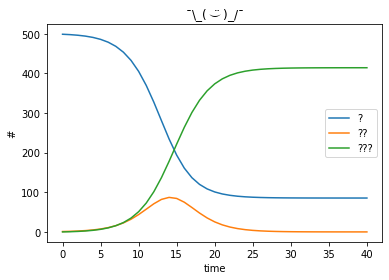

In [72]:
plt.plot(sol_recursion,label=['?','??',"???"])
plt.xlabel('time')
plt.ylabel('#')
plt.title(r'¯\_$\left( \ddot{\smile} \right) $_/¯')
plt.legend()
plt.show()

<div style="direction: rtl"> פתרון של משוואה דיפרנציאלית, גם באופן נומרי, הוא מאוד מאוד קשה: זה כמו לקחת הרבה משוואת הפרש להפרשים מאוד קטנים, או לקרב בטור טיילור בין נקודת זמן לנקודת זמן
</div>

$$ \frac{dy}{dt} = F\left[t,y\right]$$

$$ y\left(t+\Delta t\right) \approx y\left(t\right)+\Delta t \cdot  F\left[t,y\right]$$

```python
for i in ...:
    t[i+1] = t[i] + dt
    y[i+1] = y[i] + dt*dfdt(y[i],t[i])
```

<div style="direction: rtl"> רק שבפועל הקירוב הרבה יותר מסובך ונוטה לטעויות שונות ומורכבות.<br> למזלנו, אנשים עמלו עשרות שנים בשביל לפתח קוד שעושה את זה בכל זאת. <br> בחבילת scipy מגיע פותר נומרי למשוואות דיפרנציאליות בשם <code>solve_ivp</code> (מלשון <b>i</b>nitial <b>v</b>alue <b>p</b>roblem)
</div>

In [73]:
from scipy.integrate import solve_ivp

In [77]:
# solve_ivp?

<div style="direction: rtl"> נציג את מודל SIR  כפונקציה:
</div>

$$ \begin{matrix} \frac{dS}{dt} &=& -\beta S I \\ \frac{dI}{dt} &=& \beta S I - \gamma I \\ \frac{dR}{dt} &=& \gamma I \end{matrix}$$

In [11]:
def F_differential(t,y,beta=0.002,gamma=0.5):
    S,I,R = y
    S_tag = -beta*S*I
    I_tag = +beta*S*I - gamma*I
    R_tag = +gamma*I
    return np.array((S_tag, I_tag, R_tag))

<div style="direction: rtl"> וניתן לפותר: ניקח אוכלוסיה של 500 פרטים שאחד חולה והשאר פגיעים
</div>

In [75]:
sol=solve_ivp(F_differential,(0,40),[499,1,0])
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 104
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 2.82701044e-03, 3.10971149e-02, 3.13798159e-01,
       1.81108679e+00, 4.11812744e+00, 6.93156676e+00, 1.04951810e+01,
       1.42170511e+01, 1.77834509e+01, 2.15336267e+01, 2.48666163e+01,
       2.81996060e+01, 3.15392421e+01, 3.48238995e+01, 3.80939033e+01,
       4.00000000e+01])
 t_events: None
        y: array([[4.99000000e+02, 4.98997177e+02, 4.98968725e+02, 4.98661161e+02,
        4.96079031e+02, 4.85817867e+02, 4.46301353e+02, 3.17577687e+02,
        1.82157099e+02, 1.27937795e+02, 1.09275891e+02, 1.03741390e+02,
        1.01719466e+02, 1.00974609e+02, 1.00702902e+02, 1.00601338e+02,
        1.00574689e+02],
       [1.00000000e+00, 1.00140883e+00, 1.01560591e+00, 1.16902248e+00,
        2.45326143e+00, 7.48928601e+00, 2.58028440e+01, 6.96168640e+01,
        6.70197821e+01, 3.291

<div style="direction: rtl"> בניגוד לפותר הנומרי שלנו, שרק מחזיר פתרון, scipy מחזיר אובייקט ומעמיס עלינו הרבה פרטים, כמו הודאת הצלחה\כישלון, ובאיזה נקודות הוא העריך את הפונקציה
</div>

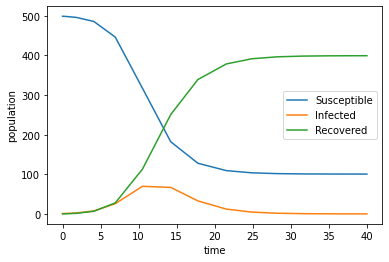

In [78]:
plt.plot(sol.t,sol.y[0],label='Susceptible')
plt.plot(sol.t,sol.y[1],label='Infected')
plt.plot(sol.t,sol.y[2],label='Recovered')
plt.xlabel('time')
plt.ylabel('population')
plt.legend()
plt.show()

<div style="direction: rtl"> נראה שהפותר לא עשה עבודה כל כך טובה! הפותר די קמצן ולא טורח לדייק ולחשב הקודות באמצע אם הוא יכול. צריך לבקש dense_output=True כדי לקבל תשובה מלאה
</div>

In [15]:
# solve_ivp?

In [79]:
sol=solve_ivp(F_differential,(0,40),[499,1,0],dense_output=True)
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 104
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7f84c2919a30>
   status: 0
  success: True
        t: array([0.00000000e+00, 2.82701044e-03, 3.10971149e-02, 3.13798159e-01,
       1.81108679e+00, 4.11812744e+00, 6.93156676e+00, 1.04951810e+01,
       1.42170511e+01, 1.77834509e+01, 2.15336267e+01, 2.48666163e+01,
       2.81996060e+01, 3.15392421e+01, 3.48238995e+01, 3.80939033e+01,
       4.00000000e+01])
 t_events: None
        y: array([[4.99000000e+02, 4.98997177e+02, 4.98968725e+02, 4.98661161e+02,
        4.96079031e+02, 4.85817867e+02, 4.46301353e+02, 3.17577687e+02,
        1.82157099e+02, 1.27937795e+02, 1.09275891e+02, 1.03741390e+02,
        1.01719466e+02, 1.00974609e+02, 1.00702902e+02, 1.00601338e+02,
        1.00574689e+02],
       [1.00000000e+00, 1.00140883e+00, 1.01560591e+00, 1.16902248e+00,
        2.45326143e+00, 7.48928601e+00,

<div style="direction: rtl"> sol.sol (שהיה קודם None) מכיל פונקצית אינטרפולציה interpolate, שנותנת קירוב של הפתרון לכל t שניתן. אם ניתן לו מערך זמנים צפוף נוכל לקבל את הגרף המלא.
</div>

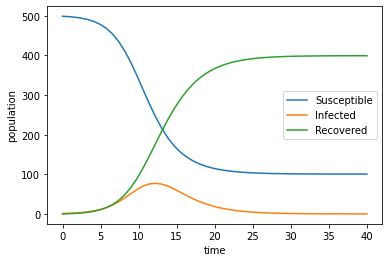

In [17]:
time=np.linspace(0,40)
y=sol.sol(time)
plt.plot(time,y[0],label='Susceptible')
plt.plot(time,y[1],label='Infected')
plt.plot(time,y[2],label='Recovered')
plt.xlabel('time')
plt.ylabel('population')
plt.legend()
plt.show()

<div style="direction: rtl"> הפותר מייצר פונקצית אינטרפולציה בין כל הנקודות ה"אמיתיות" שהוא מוצא.
</div>

In [82]:
# sol.sol?
# sol.sol.interpolants[0]

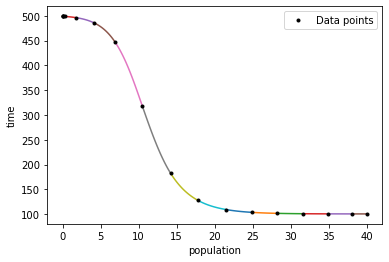

In [86]:
time=np.linspace(0,40)
y=sol.sol(time)
for intrp in sol.sol.interpolants:
    t=np.linspace(intrp.t_min,intrp.t_max)
    plt.plot(t,intrp(t)[0])
plt.plot(sol.t,sol.y[0],'.k',label='Data points')
plt.xlabel('population')
plt.ylabel('time')
plt.legend()
plt.show()

## <div style="direction: rtl"> <b> שימוש בפותר הנומרי <b> </div> ##

<div style="direction: rtl"> נשתמש בפותר כדי לפתור את מודל SIR בתנאים שונים:
</div>

In [ ]:
def F_SIR(t,y,beta=0.002,gamma=0.5):
    y0 = -beta*y[0]*y[1]
    y1 = +beta*y[0]*y[1] - gamma*y[1]
    y2 = +gamma*y[1]
    return np.array((y0,y1,y2))

<div style="direction: rtl"> ראינו (?) בהרצאה שיש מספר חשוב $R_0$ שהוא מספר ההדבקות הבסיסי. באמצעות $R_0$ אפשר לכתוב את המשוואות מחדש: 
</div>

$$R_0 = \frac{\beta}{\gamma} \rightarrow \beta = \gamma R_0$$

$$ \begin{matrix} \frac{dS}{dt} &=& -\gamma R_0 S I \\ \frac{dI}{dt} &=& \gamma \left(R_0 S I - I\right) \\ \frac{dR}{dt} &=& \gamma I \end{matrix}$$

<div style="direction: rtl"> הפרדנו פה שני דברים: יש לנו סקלת זמן $\gamma$, שפשוט משנה כמה מהר הסימולציה הולכת, ו-$R_0$ שמשנה את הצורה של הפונקציה. 
</div>

<div style="direction: rtl"> אם אנחנו משנים את $\gamma$ להיות פי 2 יותר גדולה, אז המערכת פשוט תתקדם פי שתיים יותר מהר. 
</div>

In [87]:
def F_SIR(t,y,R_0=0.008,gamma=1):
    y0 = -R_0*y[0]*y[1]
    y1 = R_0*y[0]*y[1] - y[1]
    y2 = y[1]
    return gamma*np.array((y0,y1,y2))

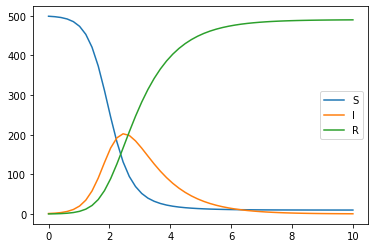

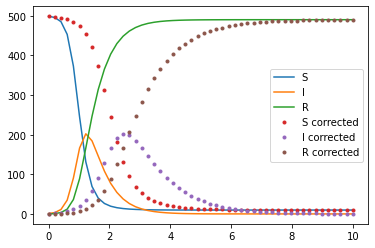

In [88]:
t0,tf = 0,10
initial=[499,1,0]
time=np.linspace(t0, tf)
sol=solve_ivp(F_SIR,(t0,tf),initial,dense_output=True)
plt.plot(time,sol.sol(time).T,label=['S','I','R'])
plt.legend()
plt.show()

# now with gamma=2
gamma = 2
t0,tf = 0,10
initial=[499,1,0]
time=np.linspace(t0, tf)
sol=solve_ivp(lambda t,y: F_SIR(t,y,gamma=2),(t0,tf),initial,dense_output=True)
plt.plot(time,sol.sol(time).T,label=['S','I','R'])
tau = time/gamma
plt.plot(time,sol.sol(tau).T,'.',label=['S corrected','I corrected','R corrected'])
plt.legend()
plt.show()

<div style="direction: rtl"> נבדוק מה קורה בערכי $R_0$ שונים:. 
</div>

In [89]:
R_0s = np.arange(0.0015,0.0075,0.0005)
R_0s

array([0.0015, 0.002 , 0.0025, 0.003 , 0.0035, 0.004 , 0.0045, 0.005 ,
       0.0055, 0.006 , 0.0065, 0.007 ])

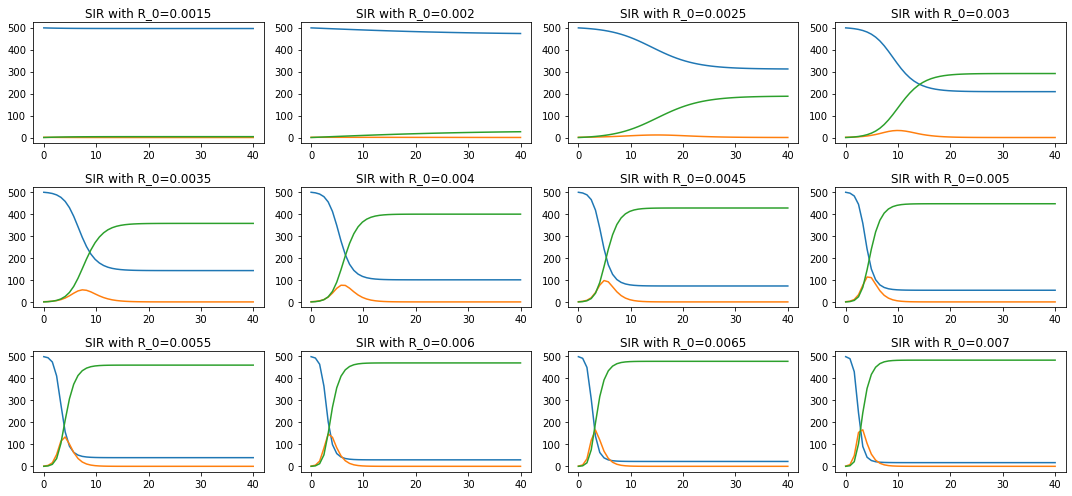

In [28]:
fig,axes = plt.subplots(3,4,figsize=(15,7))
t0,tf = 0,40
initial=[499,1,0]
time=np.linspace(t0, tf)
for axe, R_0 in zip(axes.flat, R_0s):
    plt.sca(axe)
    sol=solve_ivp(lambda t,y: F_SIR(t,y,R_0),
                  (t0,tf),initial,dense_output=True)
    plt.plot(time,sol.sol(time).T)
    plt.title(f'SIR with {R_0=:.6}')
plt.tight_layout()
plt.show()

<div style="direction: rtl"> אנחנו רואים שיש ערכים של $R_0$ שבהם לא כל האוכלוסייה נדבקת, אבל הטווח מאוד מצומצם: ב-0.0015 לא קורה כלום, וב-0.003 יותר מחצי נדבקים בסוף במחלה 
</div>

<div style="direction: rtl"> נבדוק מה קורה עם מצבי התחלה שונים: 
</div>

In [90]:
rho_I = np.linspace(0.05,0.75,4) # % infected at the beginning
total_SI = np.array([10,50,100,500,1000,5000]) # total init. population
i,j = len(rho_I), len(total_SI)

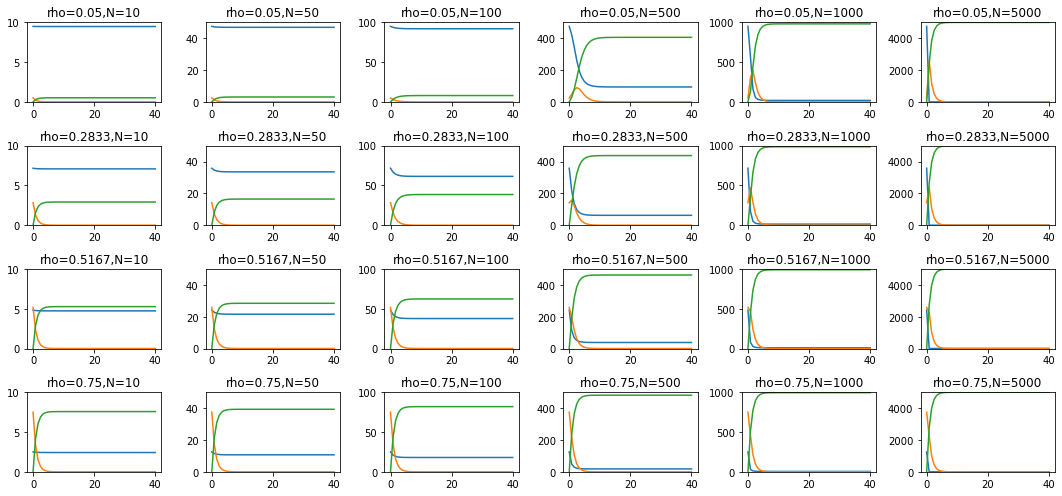

In [91]:
R_0 = 0.004
F = lambda t,y: F_SIR(t,y,R_0)
fig,axes = plt.subplots(i,j,figsize=(15,7))
t0,tf = 0,40
time=np.linspace(t0, tf)
for axii, rho in zip(axes, rho_I):
    for axe, N in zip(axii, total_SI):
        plt.sca(axe)
        initial=[(1-rho)*N, rho*N,0]
        sol=solve_ivp(F,(t0,tf),initial,dense_output=True)
        plt.plot(time,sol.sol(time).T)
        plt.title(f'{rho=:.4},{N=}')
        plt.ylim(0,N)
plt.tight_layout()
plt.show()

<div style="direction: rtl"> אפשר לראות שגודל האוכלוסייה מאוד משפיע: למרות ש-$R_0$ קבוע, באוכלוסייה קטנה אפילו 75% חולים לא גורמים למגפה בשאר האוכלוסייה, בעוד שבאוכלוסייה גדולה אפילו 5% מספיקים. 
</div>

<div style="direction: rtl"> אפשר לעשות עוד מעבר מתמטי: ניקח את המשוואות לאחוזים של $S,I,R$ ( $\rho_S, \rho_I, \rho_R$) 
</div>

$$ \begin{matrix} \frac{d\rho_S}{dt} &=\frac{1}{N} \frac{dS}{dt} &= & -\frac{1}{N}\gamma R_0 S I = & -\gamma R_0 N \rho_S \rho_I \\ \frac{d\rho_I}{dt} &= \frac{1}{N}\frac{dI}{dt} &=& \gamma \frac{1}{N} \left(R_0 S I - I\right)=& \gamma \left(R_0 N \rho_S \rho_I - \rho_I\right) \\ \frac{d\rho_R}{dt} &=\frac{1}{N}\frac{dR}{dt} &=& \frac{1}{N}\gamma I =& \gamma \rho_I \end{matrix}$$

<div style="direction: rtl"> נגדיר מחדש $\bar{R}_0=N R_0$ ונגיע בדיוק למשוואות מהסוג הראשון 
</div>

$$ \begin{matrix} \frac{d\rho_S}{dt} &=& -\gamma \bar{R}_0 \rho_S \rho_I \\ \frac{d\rho_I}{dt} &=& \gamma \left(\bar{R}_0 \rho_S \rho_I - \rho_I\right) \\ \frac{d\rho_R}{dt} &=& \gamma \rho_I \end{matrix}$$

<div style="direction: rtl"> חזרנו למשוואות עם פרמטר אחד של קצב התהליך $\gamma$ ופרמטר אחד שמשנה את צורת הפתרון $\bar{R}_0$. עכשיו השינוי בגודל האוכלוסייה וב-$\beta$ נכנסים בפרמטר $R_0$ 
</div>

In [95]:
def F_SIR(t,y,R_0=1,gamma=1):
    y0 = -R_0*y[0]*y[1]
    y1 = R_0*y[0]*y[1] - y[1]
    y2 = y[1]
    return gamma*np.array((y0,y1,y2))

In [96]:
rho_I = np.linspace(0.05,0.75,4) # % infected at the beginning
R_0s = np.linspace(0,2,5) # total init. population
i,j = len(rho_I), len(R_0s)

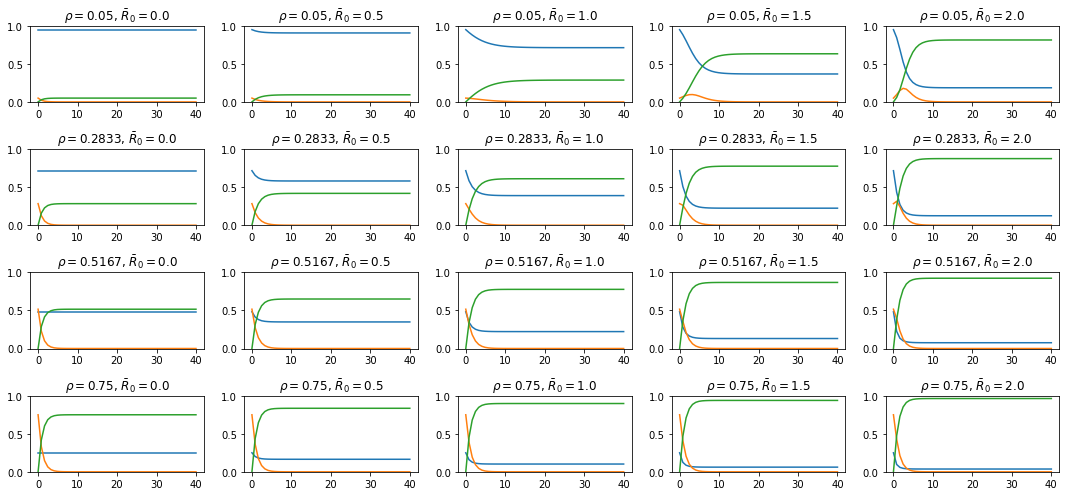

In [97]:
fig,axes = plt.subplots(i,j,figsize=(15,7))
t0,tf = 0,40
time=np.linspace(t0, tf)
for axii, rho in zip(axes, rho_I):
    for axe, R_0 in zip(axii, R_0s):
        plt.sca(axe)
        initial=[(1-rho), rho,0]
        F = lambda t,y: F_SIR(t,y,R_0)
        sol=solve_ivp(F,(t0,tf),initial,dense_output=True)
        plt.plot(time,sol.sol(time).T)
        plt.title(f'$\\{rho=:.4}$, $\\bar{{R}}_0={R_0}$')
        plt.ylim(0,1)
plt.tight_layout()
plt.show()

## <div style="direction: rtl"> <b> ציור של מרחב הפאזה עם n.meshgrid ו- plt.quiver <b> </div> ##

<div style="direction: rtl"> דבר ראשון, נרצה לצייר את מרחב $S$ ו-$I$ ולשים פה את הקו הפרמטרי $S\left(t\right),I\left(t\right)$ 
</div>

In [98]:
sol=solve_ivp(lambda t,y: F_SIR(t,y,4),(0,10),[0.95,0.05,0],dense_output=True)

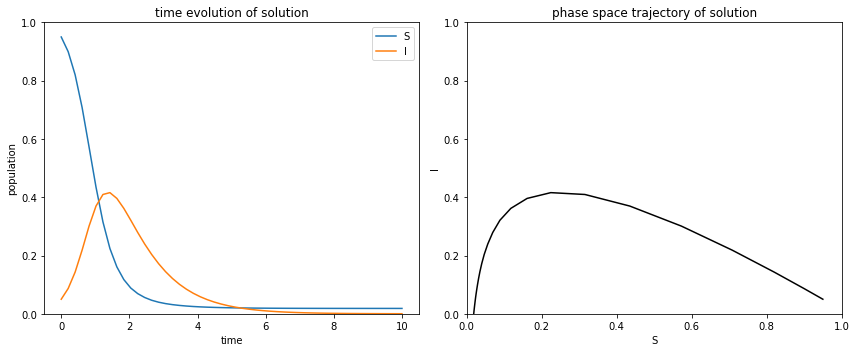

In [99]:
fig, (axe_t, axe_p) = plt.subplots(1,2,figsize=(12,5))
time=np.linspace(0,10)
s, i, _ = sol.sol(time)
axe_t.plot(time,s,label='S')
axe_t.plot(time,i,label='I')
axe_t.legend()
axe_t.set_ylim(0,1)
axe_t.set_title('time evolution of solution')
axe_t.set_xlabel('time')
axe_t.set_ylabel('population')
axe_p.plot(s,i,'k',label='S')
axe_p.set_xlim(0,1)
axe_p.set_ylim(0,1)
axe_p.set_xlabel('S')
axe_p.set_ylabel('I')
axe_p.set_title('phase space trajectory of solution')
plt.tight_layout()
plt.show()

<div style="direction: rtl"> <code>np.meshgrid</code> היא פונקציה מאוד שימושית שעוזרת לעבוד עם דברים דו ותלת מימדיים 
</div>

<div style="direction: rtl"> אם יש לנו מערך של xים <code>[x0,x1,x2,x3,x4,x5]</code> ומערך של yים <code>[y0,y1,y2,y3,y4]</code>, אנחנו נרצה הרבה פעמים למצוא מה קורה בכל נקודה במרחב $\left(x,y\right)$. פונקצית <code>meshgrid</code> לוקחת את מערכי ה-x ו-y ונותנת מטריצות X Y שנותנות לעבוד על כל נקודה  
</div>

In [101]:
# np.meshgrid?

In [102]:
x=[0,1,2,3,4,5]
y=[-2,-1,0,1,2]
X,Y = np.meshgrid(x,y)
X,Y

(array([[0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5]]),
 array([[-2, -2, -2, -2, -2, -2],
        [-1, -1, -1, -1, -1, -1],
        [ 0,  0,  0,  0,  0,  0],
        [ 1,  1,  1,  1,  1,  1],
        [ 2,  2,  2,  2,  2,  2]]))

In [103]:
X+10*Y

array([[-20, -19, -18, -17, -16, -15],
       [-10,  -9,  -8,  -7,  -6,  -5],
       [  0,   1,   2,   3,   4,   5],
       [ 10,  11,  12,  13,  14,  15],
       [ 20,  21,  22,  23,  24,  25]])

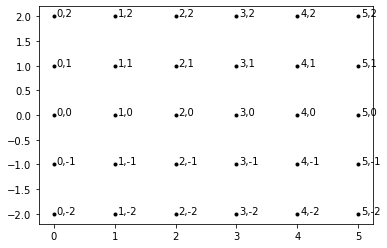

In [104]:
plt.plot(X,Y,'.k')
offset=0.05
for i in range(5):
    for j in range(6):
        plt.annotate(f'{X[i,j]},{Y[i,j]}',(X[i,j]+offset,Y[i,j]))
plt.show()

<div style="direction: rtl"> למשל, זה נוח לצייר פונקציות דו מימדיות: 
</div>

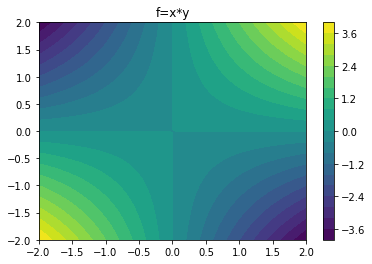

In [40]:
x=np.linspace(-2,2)
y=np.linspace(-2,2)
X,Y = np.meshgrid(x,y)
plt.contourf(X,Y,X*Y,levels=20)
plt.colorbar()
plt.title('f=x*y')
plt.show()

<div style="direction: rtl"> במקרה שלנו, זה נוח לציור מרחב הפאזה: נגדיר את המרחב של S ו-I האפשריים: 
</div>

In [105]:
rho_s=np.linspace(0,1)
rho_i=np.linspace(0,1)
S,I = np.meshgrid(rho_s,rho_i)

<div style="direction: rtl"> אפשר לצייר את הגרדיאנט בכל נקודה: אנחנו יודעים שאם אנחנו במצב $(s,i)$ המערכת תנוע לכיוון $ds/dt,di/dt$: 
</div>

In [124]:
iteration=0
s,i = 0.7,0.3
dt=0.25

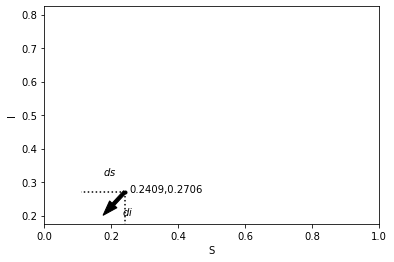

In [131]:
# repeatadly run with ctrl-enter
ds, di, _ = F_SIR(0,[s,i,0],2)
plt.plot(s,i,'.k')
plt.plot([s,s+ds],[i,i],':k')
plt.plot([s, s],[i,i+di],':k')
plt.plot(s+ds,i+di,'.k')
plt.xlim(0,1)
plt.ylim(0,1)
plt.annotate(f'{s:.4},{i:.4}',(s+0.1*abs(ds),i))
plt.annotate('$ds$',(s+0.5*ds,i-0.05*np.sign(di)))
plt.annotate('$di$',(s+0.01*np.sign(di),i+0.5*di))

plt.arrow(s,i,0.5*ds,0.5*di,color='k',length_includes_head=True,width=0.01)
plt.axis('equal')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('S')
plt.ylabel('I')
plt.show()
s=s+dt*ds
i=i+dt*di

<div style="direction: rtl"> במקום לצייר חץ אינדיבידואלי, נוכל להשתמש ברשת שיצרנו מ-np.meshgrid בשביל לחשב את הנגזרת בכל נקודה וב-בפוקנציית plt.quiver 
כדי לצייר את החצים</div>

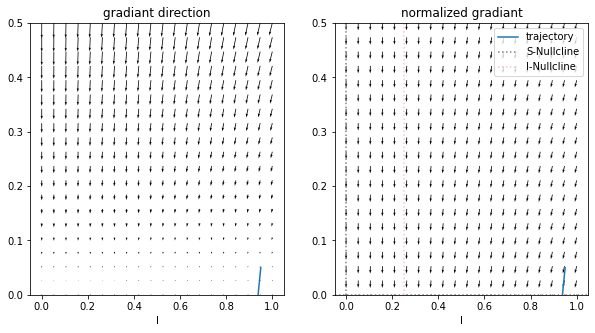

In [134]:
rho_s=np.linspace(0,1,20)
rho_i=np.linspace(0,0.5,20)
S,I = np.meshgrid(rho_s,rho_i)

F = lambda t,y: F_SIR(t,y,4)
sol=solve_ivp(F,(0,10),[0.95,0.05,0],dense_output=True)

dS, dI, _ = F(0,[S,I,0])
norm=(dS**2+dI**2)**0.5
norm = norm + (norm==0) # when norm==0 S=I=0, so divid by 1 instead

fig, axes = plt.subplots(1,2,figsize=(10,5))
plt.sca(axes[0])
plt.ylim(0,0.5)
y = sol.sol(np.linspace(0,10,100))
plt.plot(y[0],y[1])
plt.quiver(S,I,dS,dI)
plt.title("gradiant direction")
plt.xlabel('S')
plt.xlabel('I')

plt.sca(axes[1])
plt.ylim(0,0.5)
y = sol.sol(np.linspace(0,10))
plt.plot(y[0],y[1],label='trajectory')
plt.quiver(S,I,dS/norm,dI/norm)
plt.axvline(0,color='grey',linestyle=':')
plt.axhline(0,color='grey',linestyle=':',label='S-Nullcline')
plt.axvline(1/4,color='pink',linestyle=':',label='I-Nullcline')
plt.title("normalized gradiant")
plt.xlabel('S')
plt.xlabel('I')
plt.legend()
plt.show()


<div style="direction: rtl"> אפשר גם לצייר את קווי ה-nullcline, שהם איפה שאחד הכיוונים מתאפס: על ה-nullcline של $I$, רואים שבצד ימין כמות החולים גדלה $dI/dt>0$ בעוד שבצד השני הכמות יורדת $dS/dt<0$. ה-nullcline של S הוא על הצירים, ובכל הרבע החיובי הוא שלילי, ולכן כמות הפגיעים תמיד יורדת. נקודות השבת הן תמיד ההצלבה של ה-nullcline (כי אז שני הנגזרות מתאפסות). 
</div>

<div style="direction: rtl"> ספציפית יש פונקציה שנקראת streamplot שממש נועדה לצייר את המסלול מתוך משוואה של קווי מהירות: 
</div>

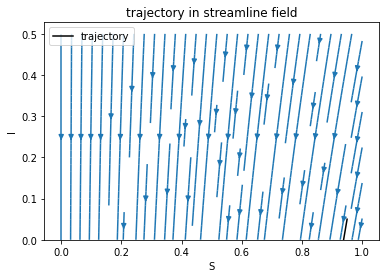

In [135]:
plt.streamplot(S,I,dS,dI)
y = sol.sol(time)
plt.plot(y[0],y[1],'k',label='trajectory')
plt.title('trajectory in streamline field')
plt.legend()
plt.xlabel('S')
plt.ylabel('I')
plt.show()